In [1]:
from Manipulator2DMap.Map import GridMap2D
from Manipulator2DMap.Manipulator2D import Manipulator_2d_supervisor, PI
from AStarDefaults.AStar import AStar, make_path

import numpy as np
import matplotlib.pyplot as plt
import itertools
import time
import heapq
from matplotlib.widgets import Slider
from ipywidgets import interact

%matplotlib inline

In [2]:
N_JOINTS = 4

args_dict = {
    'num_joints': N_JOINTS,
    'lengths': [5, 7, 5, 5],
    'angle_discretization': 180,
    'angles_constraints': np.array([PI / 6] * N_JOINTS)
}

array([ 1.85004901,  1.01229097, -0.87266463, -0.13962634])

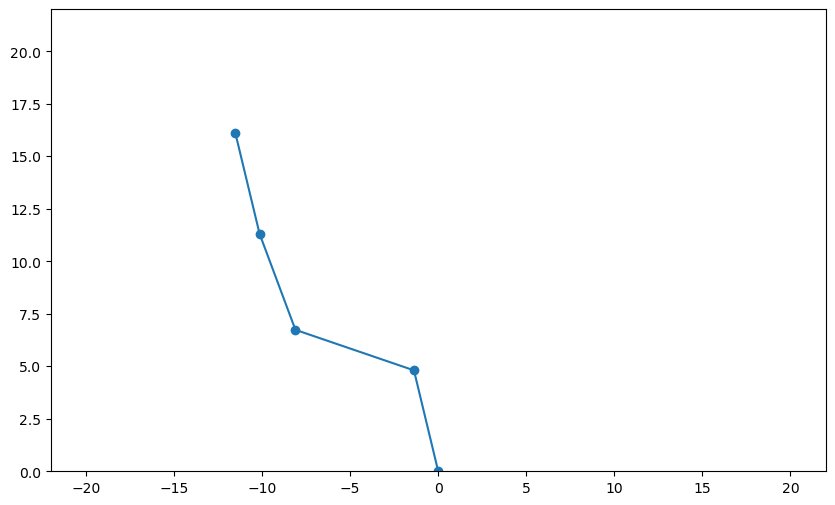

In [3]:
manipulator = Manipulator_2d_supervisor(**args_dict)

state = manipulator.generate_random_state()
manipulator.visualize_state(state)
state

In [4]:
goal_position = ((-7, 8.5), -PI/ 2)

manipulator = Manipulator_2d_supervisor(**args_dict)

In [5]:
space_map = GridMap2D(manipulator, state, goal_position)

print goal position [-7.   8.5]


In [6]:
%time result, last_state, steps, nodes_created, OPEN, CLOSED = AStar(space_map)

CPU times: user 13.1 s, sys: 49.1 ms, total: 13.1 s
Wall time: 13.1 s


In [7]:
path, length = make_path(last_state)

In [8]:
a = np.array([space_map._manipulator.calculate_end(st.state) for st in CLOSED])

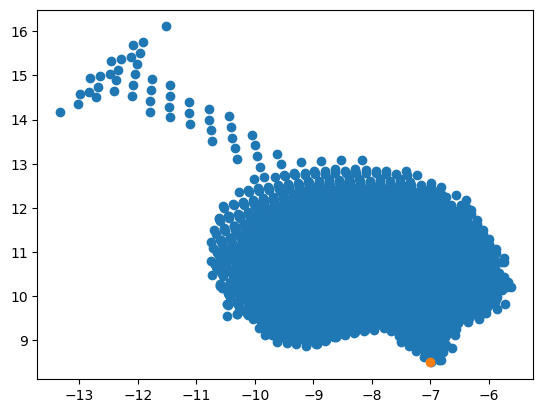

In [9]:
plt.scatter(a[:, 0], a[:,1])
plt.scatter(goal_position[0][0], goal_position[0][1])

In [10]:
def visualize_path_state(path_state=0):
    space_map._manipulator.visualize_state(path[path_state])
    
np.set_printoptions(precision=5)
interact(visualize_path_state, path_state=(0, len(path) - 1))
plt.show()

interactive(children=(IntSlider(value=0, description='path_state', max=81), Output()), _dom_classes=('widget-i…